In [10]:
data <- read.csv("Data for Short Project 3.csv")
data$sex_binary <- ifelse(data$sex == "F", 1, 0)

model_single <- glm(sex_binary ~ ARSQ_19, data = data, family = binomial)
summary(model_single)


Call:
glm(formula = sex_binary ~ ARSQ_19, family = binomial, data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   1.7055     0.8476   2.012   0.0442 *
ARSQ_19      -0.5960     0.2891  -2.062   0.0392 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58.129  on 41  degrees of freedom
Residual deviance: 53.416  on 40  degrees of freedom
AIC: 57.416

Number of Fisher Scoring iterations: 4


In [11]:
confint(model_single)
exp(confint(model_single))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.1212903,3.49281730
ARSQ_19,-1.2057875,-0.05605575


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),1.1289525,32.8784458
ARSQ_19,0.2994561,0.9454864


`geom_smooth()` using formula = 'y ~ x'


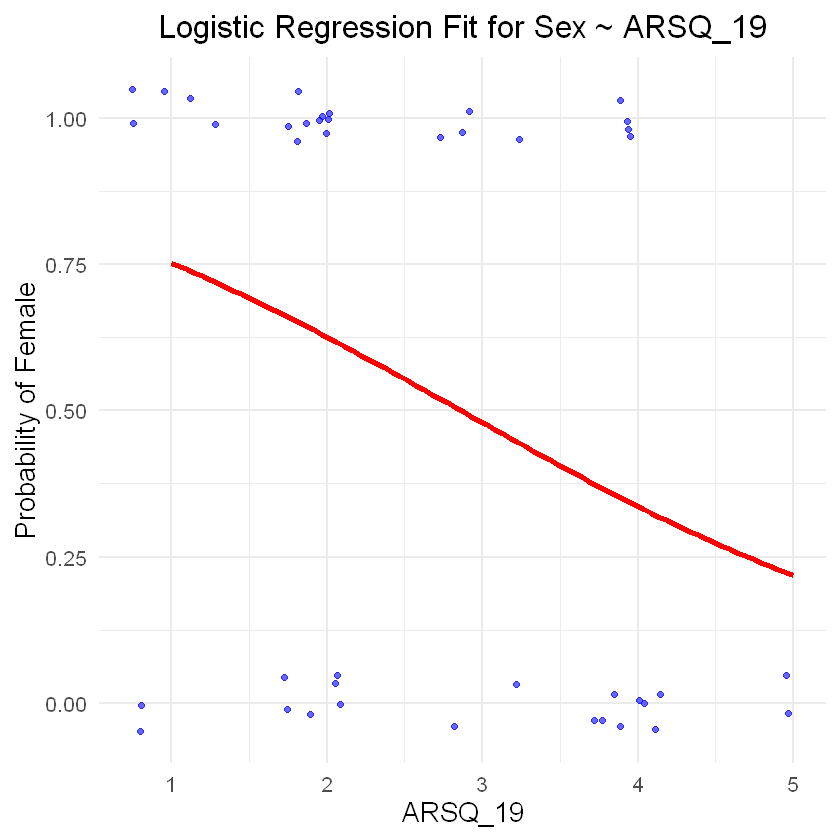

In [12]:
library(ggplot2)
ggplot(data, aes(x = ARSQ_19, y = sex_binary)) +
  geom_jitter(width = 0.3, height = 0.05, alpha = 0.6, color = "blue") + 
  stat_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, color = "red", linewidth = 1.5) +
  labs(
    y = "Probability of Female",
    x = "ARSQ_19",
    title = "Logistic Regression Fit for Sex ~ ARSQ_19"
  ) +
  theme_minimal(base_size = 16) +
  theme(plot.title = element_text(hjust = 0.5))

In [13]:
null_model <- glm(sex_binary ~ 1, data = data, family = binomial)
anova(null_model, model_single, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41,58.12909,NA,NA,NA
2,40,53.41563,1,4.71346,0.02992736


In [26]:
model_full <- glm(sex_binary ~ ARSQ_19 + 
                  UMACL.UWIST.Pogodny.Bright +
                  UMACL.UWIST.Usatysfakcjonowany.Satisfied +
                  UMACL.UWIST.Optymistyczny.Optimistic +
                  UMACL.UWIST.Passive.Bierny +
                  ARSQ_37,
                  data = data, family = binomial)
step(model_full)

Start:  AIC=54.4
sex_binary ~ ARSQ_19 + UMACL.UWIST.Pogodny.Bright + UMACL.UWIST.Usatysfakcjonowany.Satisfied + 
    UMACL.UWIST.Optymistyczny.Optimistic + UMACL.UWIST.Passive.Bierny + 
    ARSQ_37

                                           Df Deviance    AIC
- UMACL.UWIST.Optymistyczny.Optimistic      1   40.432 52.432
- UMACL.UWIST.Usatysfakcjonowany.Satisfied  1   40.794 52.794
- UMACL.UWIST.Passive.Bierny                1   40.980 52.980
- UMACL.UWIST.Pogodny.Bright                1   42.330 54.330
<none>                                          40.403 54.403
- ARSQ_37                                   1   42.862 54.862
- ARSQ_19                                   1   49.902 61.902

Step:  AIC=52.43
sex_binary ~ ARSQ_19 + UMACL.UWIST.Pogodny.Bright + UMACL.UWIST.Usatysfakcjonowany.Satisfied + 
    UMACL.UWIST.Passive.Bierny + ARSQ_37

                                           Df Deviance    AIC
- UMACL.UWIST.Passive.Bierny                1   40.998 50.998
- UMACL.UWIST.Usatysfakcj


Call:  glm(formula = sex_binary ~ ARSQ_19 + UMACL.UWIST.Pogodny.Bright + 
    ARSQ_37, family = binomial, data = data)

Coefficients:
               (Intercept)                     ARSQ_19  
                    8.4225                     -1.2982  
UMACL.UWIST.Pogodny.Bright                     ARSQ_37  
                   -2.0060                     -0.3739  

Degrees of Freedom: 41 Total (i.e. Null);  38 Residual
Null Deviance:	    58.13 
Residual Deviance: 41.73 	AIC: 49.73

In [28]:
model_multi <- glm(sex_binary ~ ARSQ_19 + UMACL.UWIST.Pogodny.Bright + 
                   ARSQ_37, data=data, family=binomial)
summary(model_multi)


Call:
glm(formula = sex_binary ~ ARSQ_19 + UMACL.UWIST.Pogodny.Bright + 
    ARSQ_37, family = binomial, data = data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)   
(Intercept)                  8.4225     2.7761   3.034  0.00241 **
ARSQ_19                     -1.2982     0.4703  -2.761  0.00577 **
UMACL.UWIST.Pogodny.Bright  -2.0060     0.7674  -2.614  0.00894 **
ARSQ_37                     -0.3739     0.2703  -1.383  0.16652   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58.129  on 41  degrees of freedom
Residual deviance: 41.730  on 38  degrees of freedom
AIC: 49.73

Number of Fisher Scoring iterations: 5
